In [8]:
import pandas as pd
import preprocessing.overview_vectorizer as ov
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [2]:
df = ov.load_files()
extracter = ov.OverViewVectorizer()

spaCy 모델 로딩 중...
완료!


In [3]:
extracter.fit(df)

   진행: 5000/20551
   진행: 10000/20551
   진행: 15000/20551
   진행: 20000/20551


In [4]:
extracter.extract_keywords()

In [5]:
result_df = extracter.df

In [7]:
pos_df, neg_df = extracter.extract_delta_keywords()

In [13]:
pos_df = pos_df.sort_values('tfidf_score').reset_index(drop=True)
neg_df = neg_df.sort_values('tfidf_score').reset_index(drop=True)

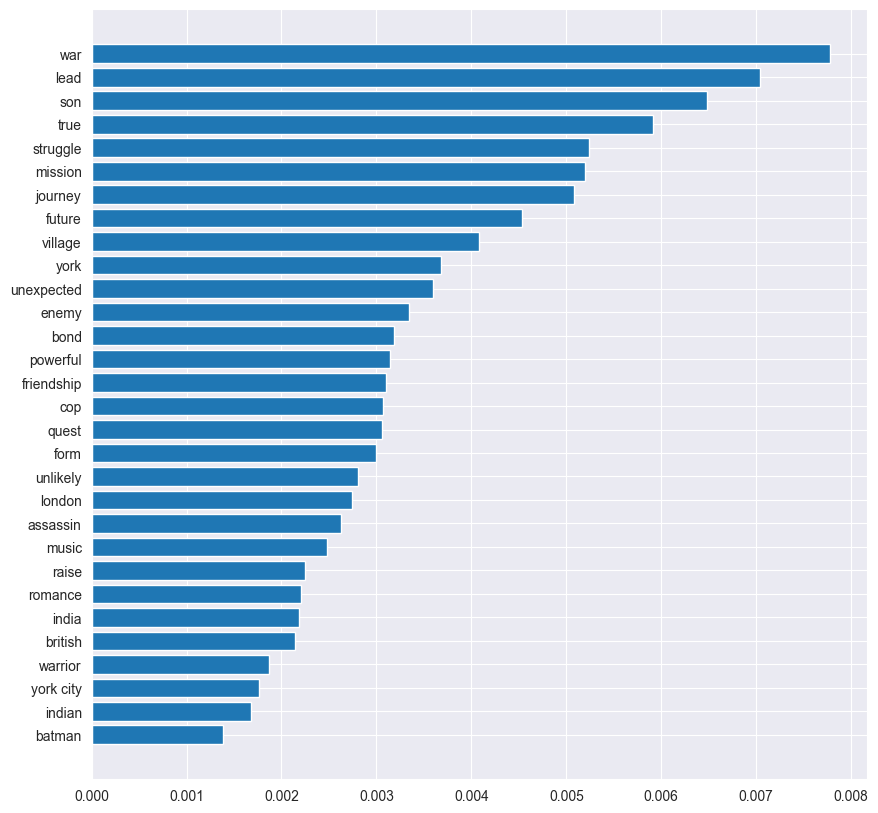

In [16]:
plt.figure(figsize = (10,10))
plt.barh(pos_df['keyword'], pos_df['tfidf_score'])
plt.show()

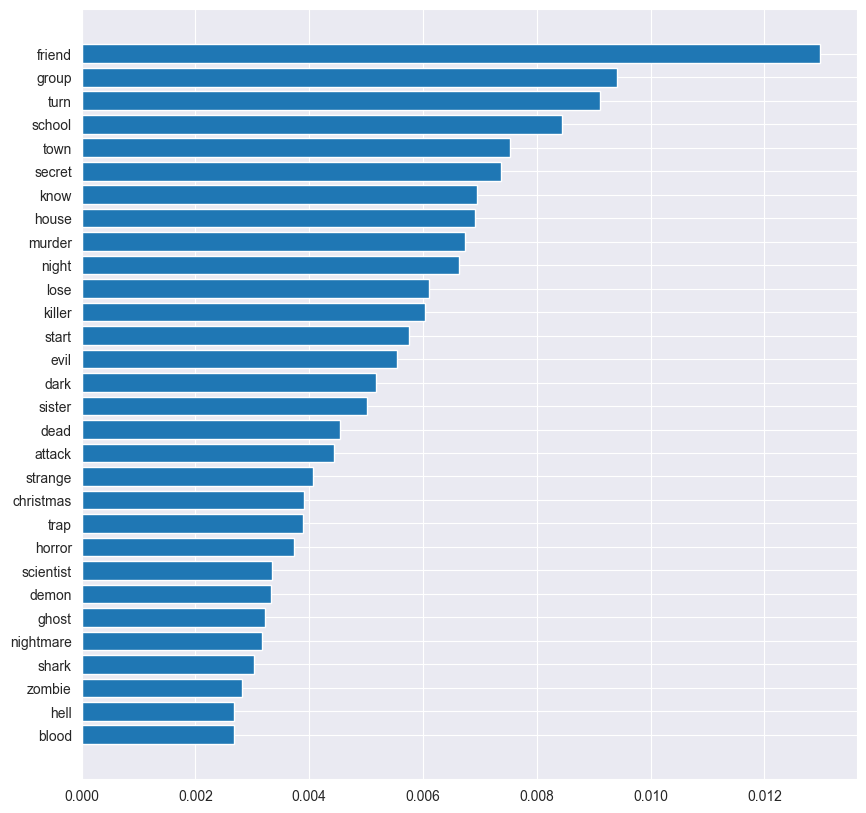

In [17]:
plt.figure(figsize = (10,10))
plt.barh(neg_df['keyword'], neg_df['tfidf_score'])
plt.show()

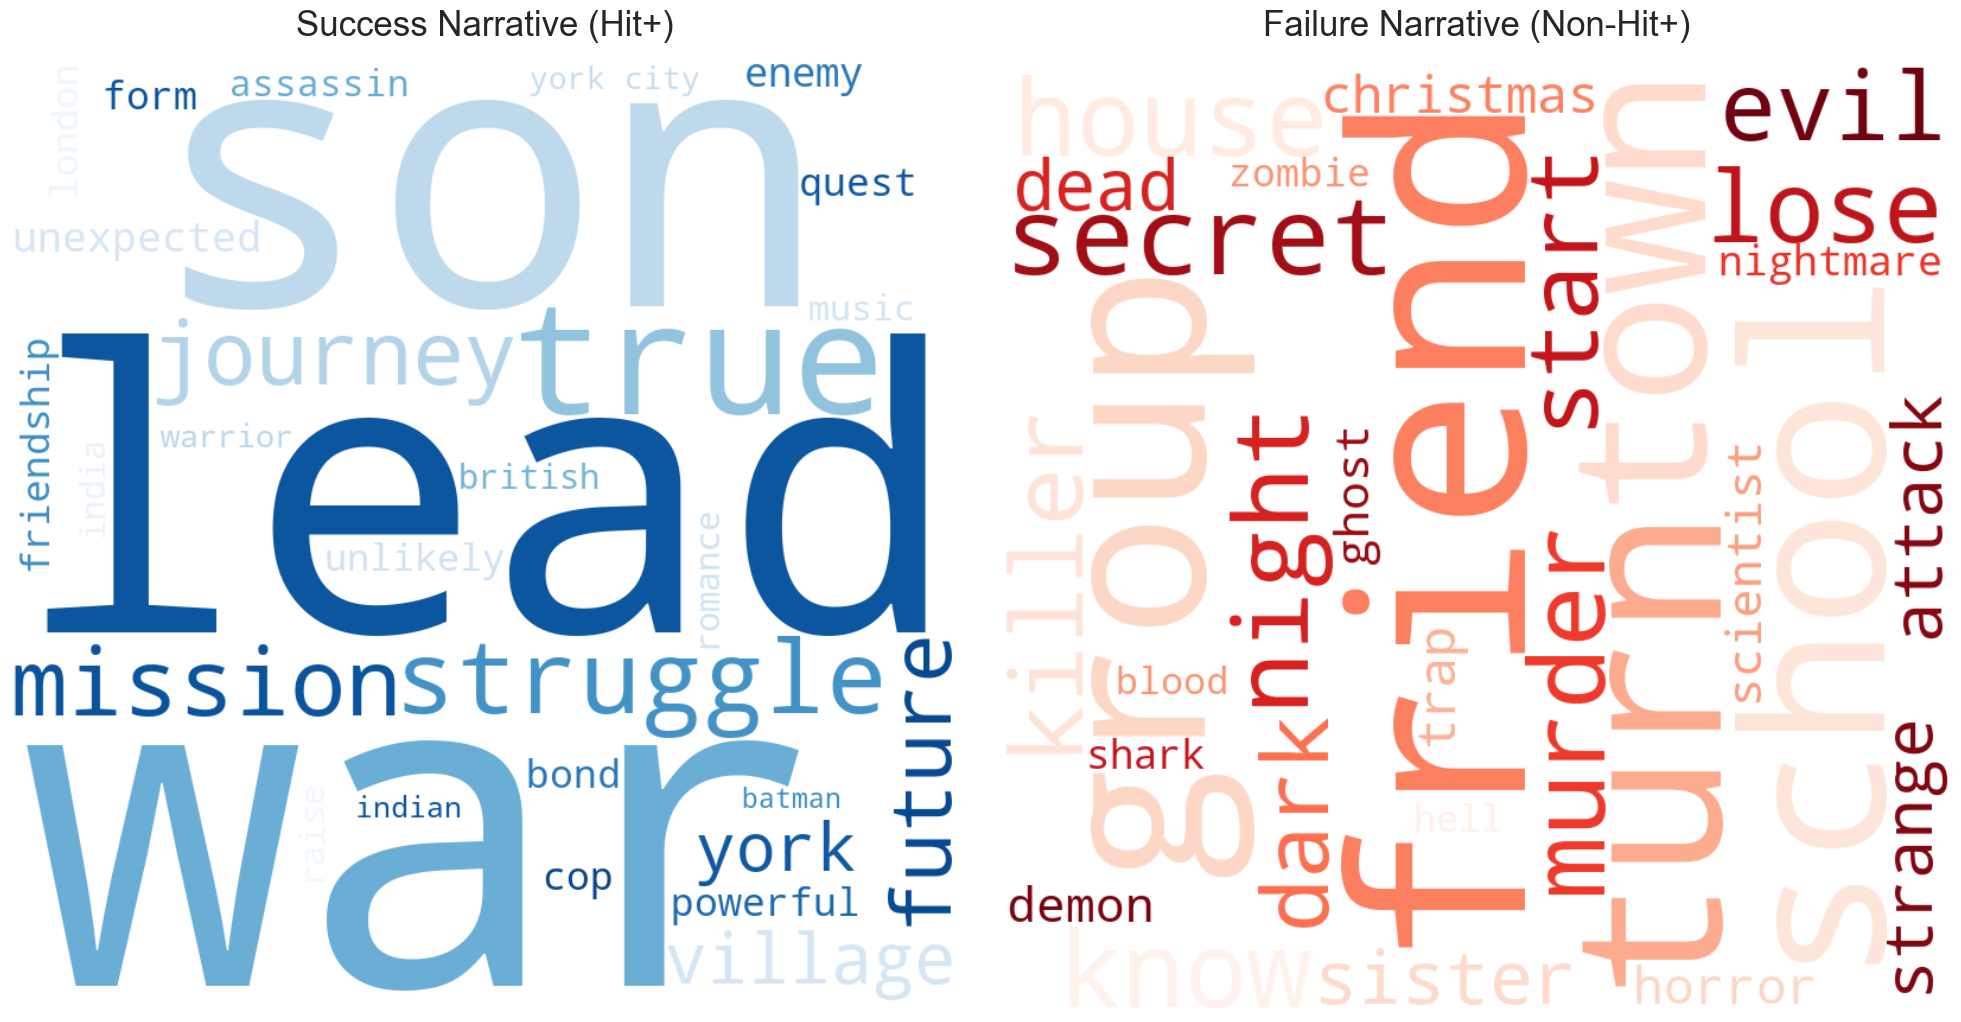

In [19]:
def draw_delta_wordclouds(pos_df, neg_df):
    # 딕셔너리 형태로 변환 (단어: 점수)
    pos_dict = dict(zip(pos_df['keyword'], pos_df['tfidf_score']))
    neg_dict = dict(zip(neg_df['keyword'], neg_df['tfidf_score']))

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    # 성공작 (Blue)
    wc_pos = WordCloud(width=800, height=800, background_color='white',
                       colormap='Blues', max_words=30).generate_from_frequencies(pos_dict)
    axes[0].imshow(wc_pos, interpolation='bilinear')
    axes[0].set_title('Success Narrative (Hit+)', fontsize=25, pad=20)
    axes[0].axis('off')

    # 실패작 (Red)
    wc_neg = WordCloud(width=800, height=800, background_color='white',
                       colormap='Reds', max_words=30).generate_from_frequencies(neg_dict)
    axes[1].imshow(wc_neg, interpolation='bilinear')
    axes[1].set_title('Failure Narrative (Non-Hit+)', fontsize=25, pad=20)
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

# 실행
draw_delta_wordclouds(pos_df, neg_df)